# 1. Analyze Synchronized freezing

---
## 1-1. Compute %_overlapped_freezing & Cohen_D

**Tasks:**
1. Read CSV files from subholders, and output "summary.csv"
2. Compute %_freezing and %_overlapped_freezing, and output to "summary1.csv"
3. Compute permutation/Cohen_D and store in DF, and output to "summary2.csv"
4. Compute lag times, and output to "summary3.csv"

**Requirements:**
    
Set path to the root folder, which contains multiple experiment folders. Each experiment folder
contains CSV files, which describe freezing onset and offset for two subjects.

**Output sumary2.csv file format:**

|Foldername_videoname|fz_start_sub1|fz_end_sub1|fz_start_sub2|fz_end_sub2|fz_sub1|fz_sub2|fz_overlap|cohen_d|lagt_start_s1_s2|lagt_start_s2_s1|lagt_end_s1_s2|lagt_end_s2_s1|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|str|int array|int array|int array|int array|float|float|float|float|int array|int array|int array|int array|

**It would take 2:30.**



In [1]:
#############################################
# Specify the folder
path = r"W:\videos_synchrony"
#############################################
import synchro_freeze as sf
import traceback
import os

DEBUG = False
df = sf.process_freeze(path,DEBUG)

Step1. Reading CSV files from subfolders.
	Processing directory: 20190408_testing_1
	Processing directory: 20190408_testing_2
	Processing directory: 20190520_test1
	Processing directory: 20190520_test2
	Processing directory: 20190611_afternoon
	Processing directory: 20190611_morning
	Processing directory: 20190801_opioid_test_morning
	Processing directory: 20190803_testmorning
	Processing directory: 20190809_morning
	Processing directory: 20190814
	Processing directory: 20190818
	Processing directory: 20190820
	Processing directory: 20190827
	Processing directory: 20190902
	Processing directory: 20190917
	Processing directory: 20191012
	Processing directory: 20191015
	Processing directory: 20191016
	Processing directory: 20191024
	Processing directory: 20191028
	Processing directory: 20191109
	Processing directory: 20191224
	Processing directory: 20200115
	Processing directory: 20200218
	Processing directory: 20200318
	Processing directory: 20200324
	Processing directory: 20200328
	Pro

C:\Users\User\Dropbox\Jupyter\wataru\synchro_freeze\synchro_freeze.py:515: RuntimeWarning: invalid value encountered in double_scalars
  Cohen_D = (_overlapFreeze - np.mean(overlapFreeze)) / np.std(overlapFreeze)


	Writing summary2.csv.

Step4. Computing lag times.
	Writing summary3.csv.


---
## 1-2. Display specific experiment
### Resulting figure will be output as overlap_fig.eps

In [2]:
print("We found the following Foldername_videoname.\n")
for i in range (0, len(df)):
    print("\t", i, df.iloc[i,0])

print("\nSelect the Foldername_videoname ID number and run the next cell")

We found the following Foldername_videoname.

	 0 20200419-134553_female pair1
	 1 20200419-134753_female pair2

Select the Foldername_videoname ID number and run the next cell


Folder name: 20200419-134753_female pair2
Animal1 freeze : 59.583333
Animal2 freeze : 46.458333
Overlap freeze : 32.083333


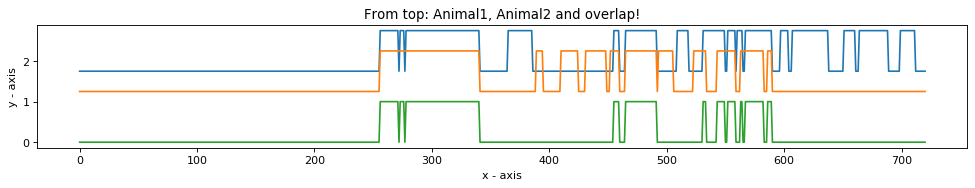

In [3]:
folderID = 1
output = True

(a,b,c,d) = sf.overlap_freezing(df.iloc[folderID,:], path, output)

---
## 1-3. Test the significance of overlapped freezing by permutation
1. Calculate overlapped freezing by permutating relative freezing dynamics between the two animals. <br>
    1K sampling of % overlapped freezing from the permutation will be stored as "test1.csv".
2. One-Sample Wilcoxon Signed Rank Test in R using the "r-codes" notebook.<br>
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r